#Errorbarjitter

##Introduction
The purpose of this script is to provide modular code for generating errorbarjitter plots using python and pandas. The framework for this code was written in collaboration with Jason Wittenbach (@jwittenbach) of Janelia Research Campus. The idea is based on the matlab errorbarjitter code writtten by David Stern, also of Janelia Research Campus. This version uses free and open source software to achieve the same plot.

As in the original errorbarjitter, this function plots the mean ± SD of one or more samples alongside the raw data.
The raw data are "jittered" and an alpha value adds transparency to aid in separation of individual data points. This form of data presentation invites active analysis of the raw data by the reader.

The following arguments can be passed to errorbarjitter:
1. df -- dataframe to be analyzed
2. groupByCol -- choose the column which contains the groups you would like to analyze by.
3. statsCol -- choose the metric on which you would like to calculate the mean and SD
4. fig -- can set fig = plt.fig() if you add additional information to the plot
5. xlab -- can pass a string argument in quotes for the x label
6. ylab -- can pass a string argument in quotes for the y label

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
sns.set_style('darkgrid')
sns.set_context('talk')

##errorbarjitter function

In [13]:
def errorbarjitter(df, groupByCol, statsCol, fig=None, xlab='group', ylab='units'):
    grouped = df.groupby([groupByCol])
    stats = grouped.aggregate({statsCol:[np.std, np.mean]})

    groups = df[groupByCol].unique()
    means, devs = stats[statsCol]['mean'], stats[statsCol]['std']
    
    plt.figure(figsize=(15,7))
    
    if fig is None:
        fig = plt.figure()
        
    for (i, (m, s)) in enumerate(zip(means, devs)):
        pts = np.array(df[df[groupByCol]==groups[i]][statsCol])
        x = i*np.ones(len(pts)) + 0.2*np.random.rand(len(pts))-0.1
        plt.scatter(x, pts, c='k', alpha=0.5)
        delta = 0.22
        plt.scatter(i+delta, m, edgecolor='k', facecolor='none', linewidth='3', s=25)
        plt.plot([i+delta, i+delta], [m-s, m+s], '-', c=[0, 0, 0], lw=2.0)
    plt.xticks(range(len(groups)), groups, rotation=45);
    plt.xlabel(xlab)
    plt.ylabel(ylab)

##Example 1:
Here I created simple use case for the errorbarjitter function.

Consider a simple experiment in which 5 runners run a course 10 times. During each trial their elapsed time is recorded. The distribution of each runner's average time can be visualized using an errorbarjitter plot.

In [6]:
path = "ex-data.csv";
exdata = pd.read_csv(path)
exdata.head()

,runner,time
0,1,5
1,1,5
2,1,6
3,1,4
4,1,4


In [7]:
grouped = exdata.groupby(['runner'])
stats = grouped.aggregate({'time':[np.std, np.mean]})
stats

time      
             std  mean
runner                
1       1.475730   5.2
2       1.663330  10.1
3       3.027650  15.5
4       2.616189  21.2
5       3.373096  25.6

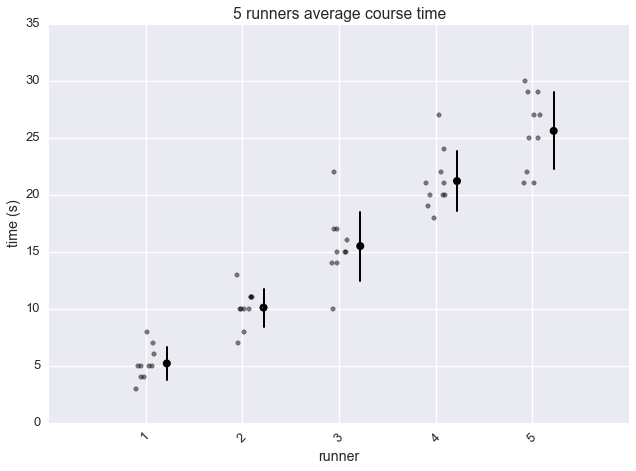

In [14]:
fig = plt.figure()
errorbarjitter(exdata, 'runner', 'time', xlab = 'runner', ylab = 'time (s)')
plt.title('5 runners average course time')

##Iris dataset example
In this second example I use the iris dataset, obtained from Anderson[1].

It is simple to use errorbarjitter to plot the each of the metrics by speices as shown below.


In [15]:
path = "iris.csv";
data = pd.read_csv(path)
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


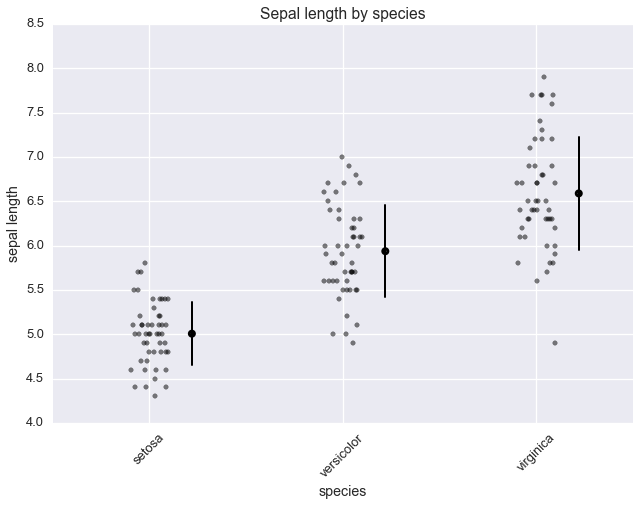

In [16]:
fig = plt.figure()
errorbarjitter(data, 'Species', 'Sepal.Length', xlab = 'species', ylab = 'sepal length')
plt.title('Sepal length by species')

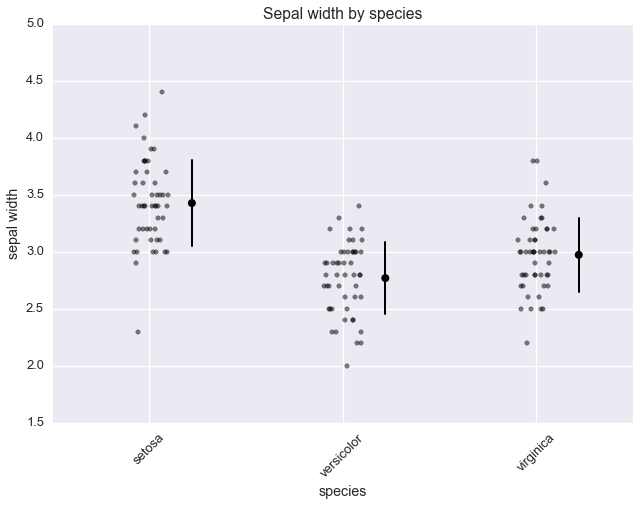

In [17]:
fig = plt.figure()
errorbarjitter(data, 'Species', 'Sepal.Width', xlab = 'species', ylab = 'sepal width')
plt.title('Sepal width by species')

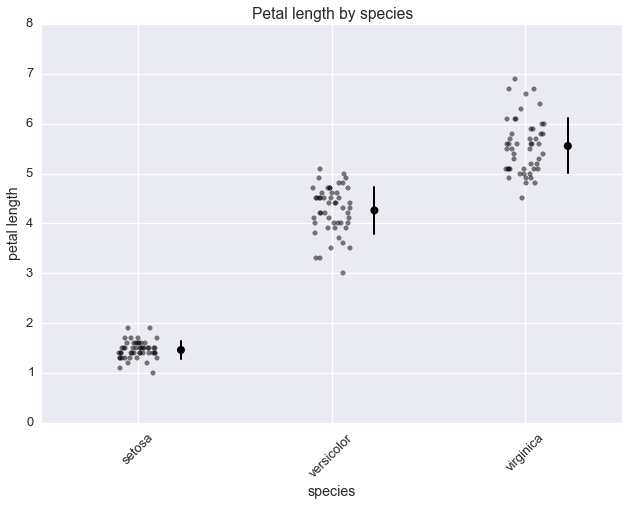

In [18]:
fig = plt.figure()
errorbarjitter(data, 'Species', 'Petal.Length', xlab = 'species', ylab = 'petal length')
plt.title('Petal length by species')

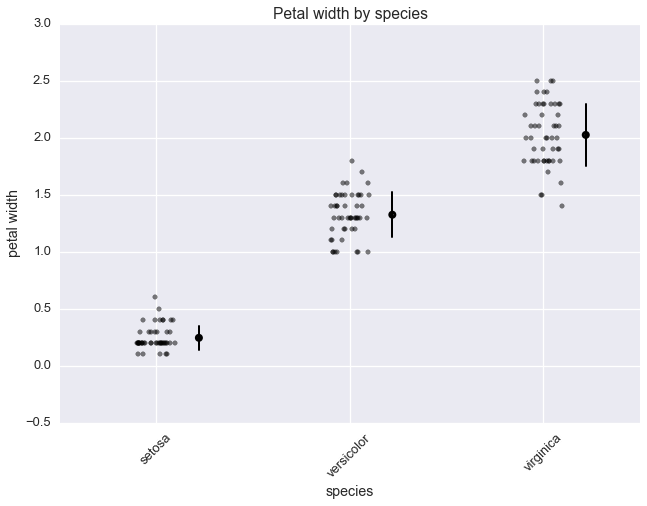

In [19]:
fig = plt.figure()
errorbarjitter(data, 'Species', 'Petal.Width', xlab = 'species', ylab = 'petal width')
plt.title('Petal width by species')

References:

[1] errorbarjitter. David Stern. http://www.mathworks.com/matlabcentral/fileexchange/33658-errorbarjitter

[2] The data were collected by Anderson, Edgar (1935). The irises of the Gaspe Peninsula, Bulletin of the American Iris Society, 59, 2–5.

[3] Fisher, R. A. (1936) The use of multiple measurements in taxonomic problems. Annals of Eugenics, 7, Part II, 179–188.

[4] Becker, R. A., Chambers, J. M. and Wilks, A. R. (1988) The New S Language. Wadsworth & Brooks/Cole. 

##Appendix:

###Theme options with sns.set_style:
'darkgrid' 
'whitegrid'
'dark' 
'white' 
'ticks'



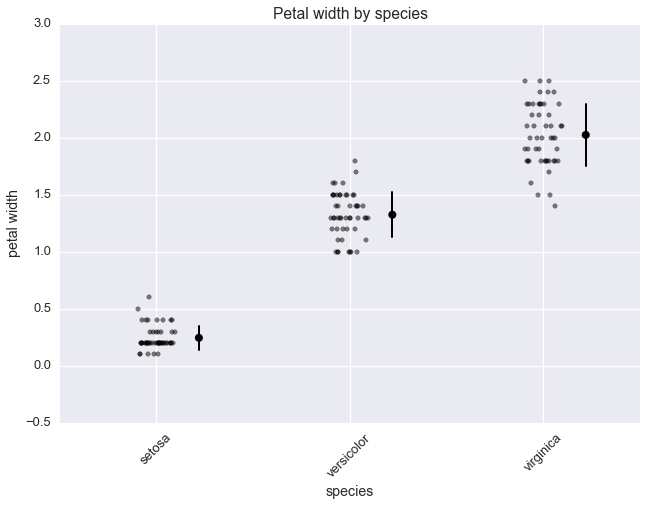

In [20]:
sns.set_style('darkgrid')
fig = plt.figure()
errorbarjitter(data, 'Species', 'Petal.Width', xlab = 'species', ylab = 'petal width')
plt.title('Petal width by species')

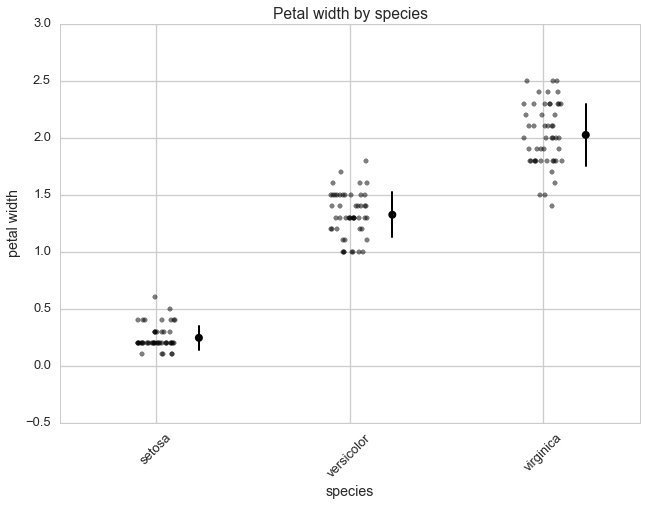

In [21]:
sns.set_style('whitegrid')
fig = plt.figure()
errorbarjitter(data, 'Species', 'Petal.Width', xlab = 'species', ylab = 'petal width')
plt.title('Petal width by species')

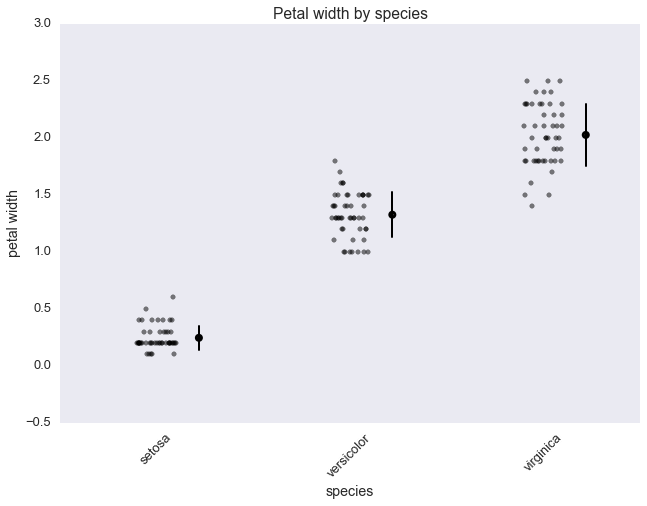

In [22]:
sns.set_style('dark')
fig = plt.figure()
errorbarjitter(data, 'Species', 'Petal.Width', xlab = 'species', ylab = 'petal width')
plt.title('Petal width by species')

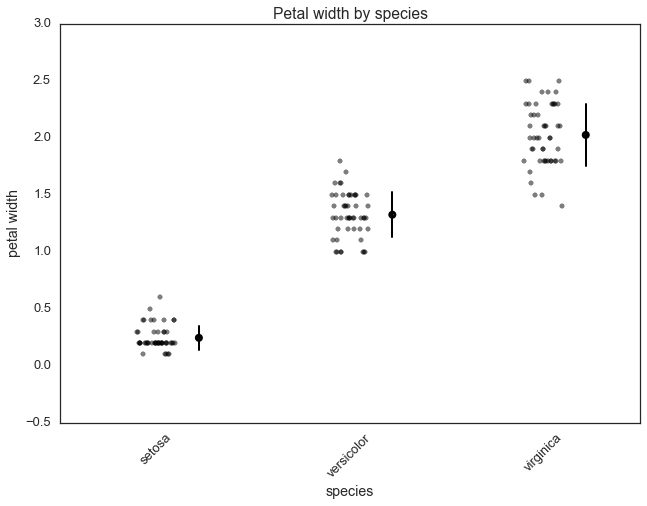

In [23]:
sns.set_style('white')
fig = plt.figure()
errorbarjitter(data, 'Species', 'Petal.Width', xlab = 'species', ylab = 'petal width')
plt.title('Petal width by species')

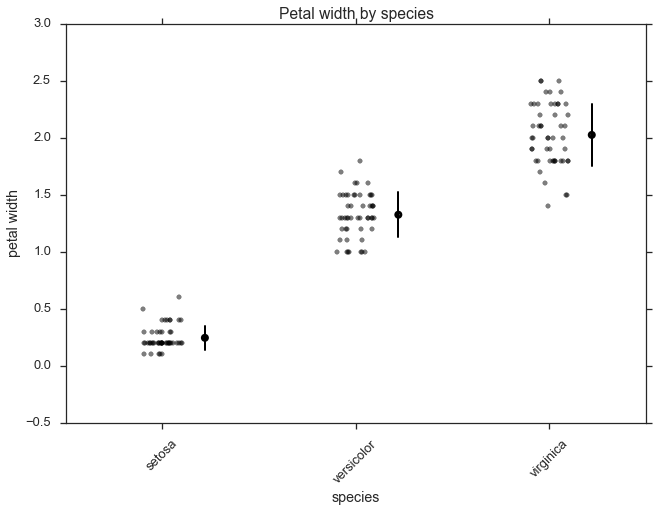

In [24]:
sns.set_style('ticks')
fig = plt.figure()
errorbarjitter(data, 'Species', 'Petal.Width', xlab = 'species', ylab = 'petal width')
plt.title('Petal width by species')